In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./Data/clean.csv',index_col='Time_Stamp',low_memory=False)
#df['area'] = pd.read_csv('./Data/area.csv',index_col='Time stamp',low_memory=False)
df['raw'].shape

(38709, 6)

In [3]:
df['raw'].head()

,Weekday,Area,Sub_Area,Free_Spots,Used_Spots,Full%
Time_Stamp,,,,,,
2014-04-08 08:00:00,Yes,12th Ave,12TH AVE BETWEEN E MARION ST AND E SPRING ST,12.0,0.0,0.0
2014-04-08 08:00:00,Yes,12th Ave,12TH AVE BETWEEN E COLUMBIA ST AND E MARION ST,13.0,7.0,35.0
2014-04-08 08:00:00,Yes,12th Ave,12TH AVE BETWEEN E SPRING ST AND E MADISON ST,15.0,4.0,21.0
2014-04-08 08:00:00,Yes,12th Ave,12TH AVE BETWEEN E JAMES CT AND E CHERRY ST,4.0,2.0,33.0
2014-04-08 08:00:00,Yes,12th Ave,12TH AVE BETWEEN E BARCLAY CT AND E JAMES CT,8.0,0.0,0.0


# Data exploration

Because this is an example, i will choose one specific parking area to predict. 

## Choosing the area

For reference, i will investigate the content of Parking_Spaces, as it is not clear what this means.

In [4]:
df['raw']['Sub_Area'].value_counts().head()

NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST        77
NW 54TH SR ST BETWEEN 30TH WR AVE NW AND 32ND AVE NW    75
7TH AVE S BETWEEN S MAIN ST AND S JACKSON ST            67
MAYNARD AVE S BETWEEN S JACKSON ST AND S KING ST        67
MAYNARD AVE S BETWEEN S KING ST AND S WELLER ST         66
Name: Sub_Area, dtype: int64

54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST is the parking spot with the most entries. These entries will be the ones used for modeling.

In [5]:
df['data'] = df['raw'][df['raw']['Sub_Area'].isin({'NW 54TH SR ST BETWEEN 32ND AVE NW AND NW 54TH ST'})]

## Exploration

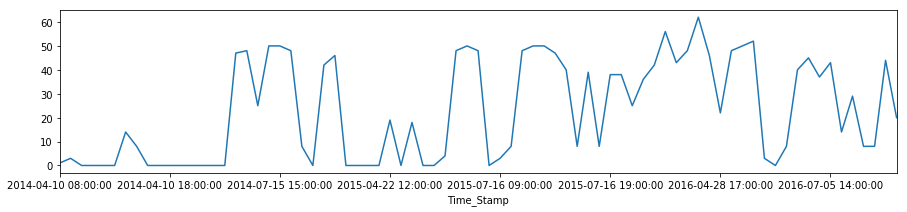

In [6]:
#Time series plot
plt.figure(figsize=(15,3));
df['data']['Full%'].plot();
plt.show();


In [7]:
df['raw']['Free_Spots'].value_counts().head(10)

10.0    2475
8.0     2355
14.0    2140
12.0    1930
18.0    1919
6.0     1912
7.0     1664
16.0    1657
4.0     1635
9.0     1406
Name: Free_Spots, dtype: int64

Entire dataset


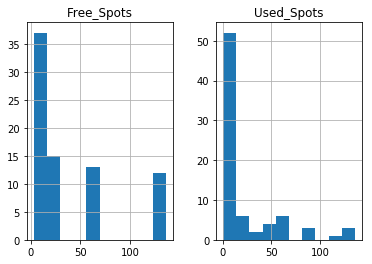

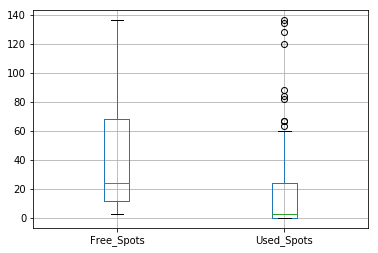

In [8]:
print('Entire dataset')
df['data'][['Free_Spots','Used_Spots']].hist()
plt.show()
df['data'][['Free_Spots','Used_Spots']].boxplot()
plt.show()

Weekdays


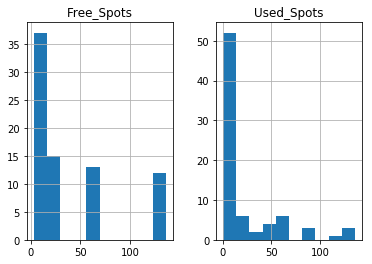

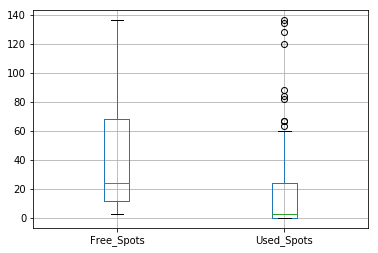

In [9]:
print('Weekdays')
obj = df['data'][df['data'].Weekday.isin({'Yes'})]
obj[['Free_Spots','Used_Spots']].hist()
plt.show()
obj[['Free_Spots','Used_Spots']].boxplot()
plt.show()

Weekends


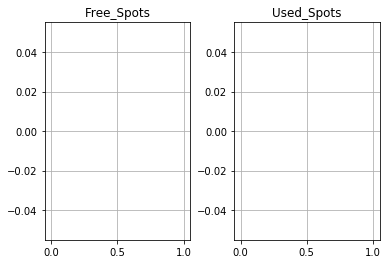

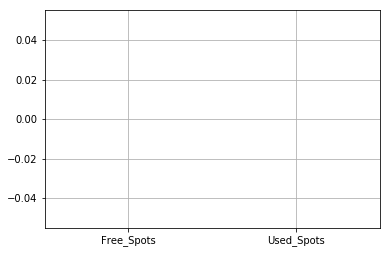

In [10]:
print('Weekends')
obj = df['data'][df['data'].Weekday.isin({'No'})]
obj[['Free_Spots','Used_Spots']].hist()
plt.show()
obj[['Free_Spots','Used_Spots']].boxplot()
plt.show()

The boxplots tell me that all observations was made on weekdays. This means i will not be able to guratantee the performance of weekends, as i cant validate the model on these days, and cannot look for differences between weekdays and weekends.

# Modeling

## Test train split
Before any modeling is done, the dataset will be spit into a test/train set.

In [20]:
from sklearn.model_selection import train_test_split
TRAIN,TEST,notused,notused = train_test_split(df['data']['Full%'],
                                                    df['data']['Full%'], 
                                                    test_size=0.25)
TRAIN.sort_index(inplace=True)
TEST.sort_index(inplace=True)

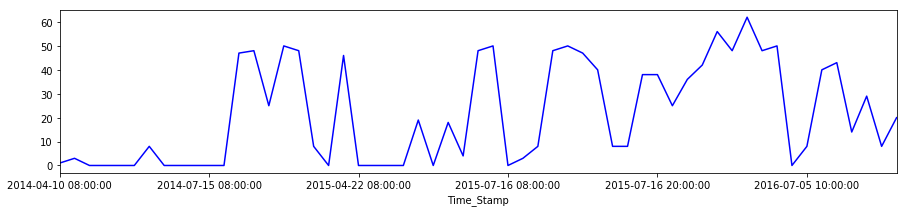

In [34]:
plt.figure(figsize=(15,3));
TRAIN.plot(color='blue')
#TEST.plot(color='red',sharex=True)
plt.show();

In [19]:
TRAIN.head()

Time_Stamp
2016-04-28 18:00:00    48.0
2014-04-10 11:00:00     0.0
2016-07-05 14:00:00    43.0
2015-07-16 13:00:00    50.0
2015-07-16 08:00:00     0.0
Name: Full%, dtype: float64

In [16]:
#TRAIN.index.tolist()

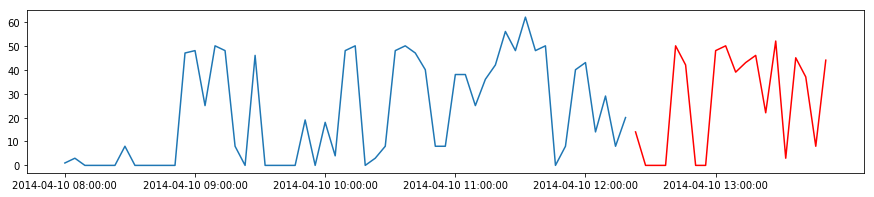

In [38]:
plt.figure(figsize=(15,3))

x = TRAIN.index.tolist()
y = TRAIN.values
plt.plot(x,y)

x = TEST.index.tolist()
y = TEST.values
plt.plot(x,y,color='red')
plt.locator_params(axis='x',nbins=6)
plt.show()